In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

import pylab
pylab.rcParams['figure.figsize'] = (6.5, 5)
plt.rcParams.update({'font.size': 22})
plt.rcParams['text.latex.preamble'] = [r"\usepackage{lmodern}"]
params = {'text.usetex': True,
         'font.size': 22,
         'font.family': 'lmodern',
         'text.latex.unicode': True,
         }
plt.rcParams.update(params)

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120), (44, 160, 44), (152, 223, 138),
             (214, 39, 40), (255, 152, 150), (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229)] 
tableau20 = [ (c[0]/255., c[1]/255., c[2]/255.) for c in tableau20]

# Bilinear Objective

Example of bilinear objectives is WGAN with a discriminator $D(x) = \phi x$, between $x_{true} \sim \mathcal{N}(0,1)$ and $x_{gen} = z + \theta$ with $z \sim \mathcal{N}(0,1)$ then: $$\min_\theta \max_\phi \theta\phi$$
Note: 
- Actually works for any distribution, as long as the discriminator and generator are linear.
- Draw a line between both distribution at the middle of the means, and shift the distribution until the mean is the same.

/Users/yangzhenhuan/anaconda3/envs/python27/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'lmodern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


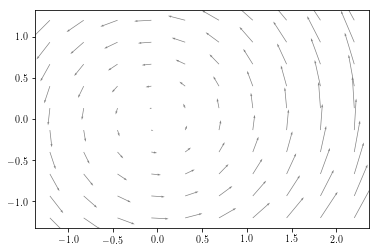

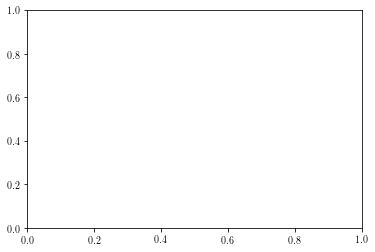

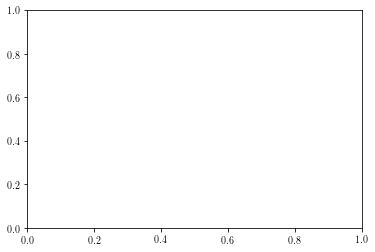

In [2]:
x_0, y_0 = 2., 0.5
OUTPUT_PATH = 'figure'
N_ITER = 100
markevery=10
X, Y = np.meshgrid(np.linspace(-1.2, 2.2, 10), np.linspace(-1.2, 1.2, 10))
F_x = -Y
F_y = X

fig1 = plt.figure(1)
ax1 = fig1.gca()
fig2 = plt.figure(2)
ax2 = fig2.gca()
fig3 = plt.figure(3)
ax3 = fig3.gca()
Q = ax1.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.002)

def grad(x, y):
    return -y, x

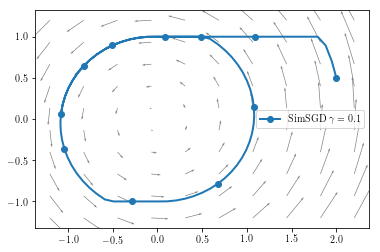

In [3]:
#Simultaneous Gradient Descent
x, y = x_0, y_0
LR = 0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    x_ = x + LR*g_x
    y_ = y + LR*g_y
    x, y = x_, np.clip(y_, -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

sim_sgd = ax1.plot(x_hist, y_hist, c=tableau20[0],alpha=1,linewidth=2, label='SimSGD $\gamma=0.1$',markevery=markevery, marker='o')
ax2.plot(loss_hist, c=tableau20[0], label='SimSGD $\gamma=0.1$')
ax3.plot(grad_norm, c=tableau20[0], label='SimSGD $\gamma=0.1$')
fig1

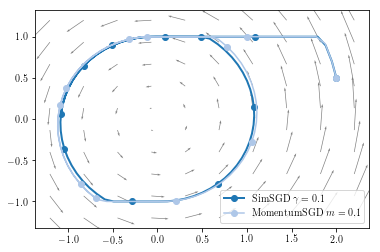

In [4]:
# Gradient Descent with momentum
x, y = x_0, y_0
v_x, v_y = 0., 0.
LR = 0.1
MOMENTUM = 0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    v_x = MOMENTUM*v_x + LR*g_x
    v_y = MOMENTUM*v_y + LR*g_y
    x_ = x + v_x
    y_ = y + v_y
    x, y = x_, np.clip(y_, -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

sgd_momentum = ax1.plot(x_hist, y_hist, marker='o', c=tableau20[1], markevery=markevery)
ax2.plot(loss_hist, c=tableau20[1], label='SGD with momentum $\gamma=0.1$')
ax3.plot(grad_norm, c=tableau20[1], label='SGD with momentum $\gamma=0.1$')
fig1

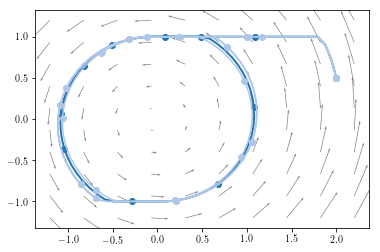

In [6]:
# Gradient Descent with negative momentum
x, y = x_0, y_0
v_x, v_y = 0., 0.
LR = 0.1
MOMENTUM = -0.1
x_hist, y_hist = [x_0], [y_0]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    v_x = MOMENTUM*v_x + LR*g_x
    v_y = MOMENTUM*v_y + LR*g_y
    x_ = x + v_x
    y_ = y + v_y
    x, y = x_, np.clip(y_, -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

sgd_negative_momentum = ax1.plot(x_hist, y_hist, marker='o', c=tableau20[1], markevery=markevery)
ax2.plot(loss_hist, c=tableau20[1], label='SGD with momentum $\gamma=0.1$')
ax3.plot(grad_norm, c=tableau20[1], label='SGD with momentum $\gamma=0.1$')
fig1

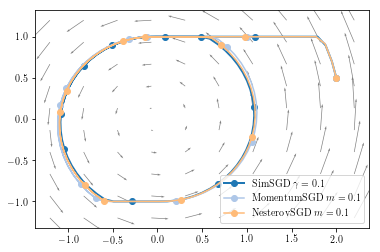

In [5]:
# Gradient Descent with Nesterov momentum
x, y = x_0, y_0
v_x, v_y = 0., 0.
LR = 0.1
MOMENTUM = 0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x+MOMENTUM*v_x,y+MOMENTUM*v_y)
    v_x = MOMENTUM*v_x + LR*g_x
    v_y = MOMENTUM*v_y + LR*g_y
    x_ = x + v_x
    y_ = y + v_y
    x, y = x_, np.clip(y_, -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

sgd_nesterov = ax1.plot(x_hist, y_hist, marker='o', c=tableau20[3], markevery=markevery)
ax2.plot(loss_hist, c=tableau20[3], label='SGD with nesterov momentum $\gamma=0.1$')
ax3.plot(grad_norm, c=tableau20[3], label='SGD with nesterov momentum $\gamma=0.1$')
fig1

In [127]:
# Gradient Descent with Negative Nesterov momentum
x, y = x_0, y_0
v_x, v_y = 0., 0.
LR = 0.1
MOMENTUM = -0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x+MOMENTUM*v_x,y+MOMENTUM*v_y)
    v_x = MOMENTUM*v_x + LR*g_x
    v_y = MOMENTUM*v_y + LR*g_y
    x_ = x + v_x
    y_ = y + v_y
    x, y = x_, np.clip(y_, -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

#sgd_negative_nesterov = ax1.plot(x_hist, y_hist, c=tableau20[3], alpha=1,linewidth=2)
#ax1.plot(x_hist[10], y_hist[10], marker='o',ms=8, mec='k', mew=0.2, c=tableau20[3],alpha=1,zorder=100)
#ax1.plot(x_hist[50], y_hist[50], marker='X',ms=12, mec='k', mew=0.2, c=tableau20[3],alpha=1,zorder=100)
#ax2.plot(loss_hist, c=tableau20[3], label='SGD with nesterov momentum $\gamma=0.1$')
#ax2.plot(10,loss_hist[10], marker='o',ms=8, mec='k', mew=0.2, c=tableau20[3],alpha=1,zorder=100)
#ax2.plot(50,loss_hist[50], marker='X',ms=12, mec='k', mew=0.2, c=tableau20[3],alpha=1,zorder=100)
#ax3.plot(grad_norm, c=tableau20[3], label='SGD with nesterov momentum $\gamma=0.1$')
#fig1

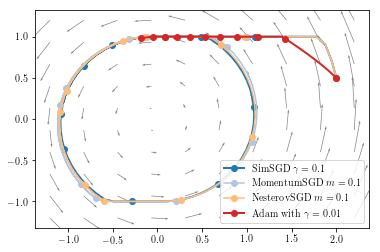

In [6]:
# Adam
x, y = x_0, y_0
v_x, v_y = 0., 0.
m_x, m_y = 0., 0.
LR = 0.01
BETA_1 = 0.
BETA_2 = 0.99
EPSILON = 1e-8
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    g_x, g_y = grad(x,y)
    m_x = BETA_1*m_x + (1-BETA_1)*g_x
    m_y = BETA_1*m_y + (1-BETA_1)*g_y 
    v_x = BETA_2*v_x + (1-BETA_2)*g_x**2
    v_y = BETA_2*v_y + (1-BETA_2)*g_y**2
    m_hat_x = m_x/(1-BETA_1**(i+1))
    m_hat_y = m_y/(1-BETA_1**(i+1))
    v_hat_x = v_x#/(1-BETA_2**(i+1))
    v_hat_y = v_y#/(1-BETA_2**(i+1))
    
    x_ = x + LR*m_hat_x/(np.sqrt(v_hat_x)+EPSILON)
    y_ = y + LR*m_hat_y/(np.sqrt(v_hat_y)+EPSILON)
    x, y = x_, np.clip(y_, -1, 1)
    #x, y = x_, y_
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(y**2 + x**2)

adam = ax1.plot(x_hist, y_hist, c=tableau20[6], alpha=1,linewidth=2, label=r'Adam with $\gamma=0.01$',markevery=markevery, marker='o')
ax2.plot(loss_hist, c=tableau20[6], label=r'Adam with $\gamma=0.01$')
ax3.plot(grad_norm, c=tableau20[6], label=r'Adam with $\gamma=0.01$, $\beta_1=0$ and $\beta_2=0.99$')
fig1

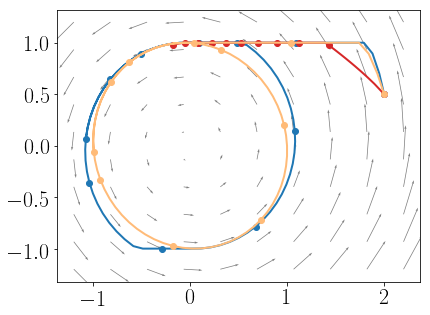

In [129]:
# Alternating Gradient Descent
x, y = x_0, y_0
LR = 0.1
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    y = np.clip(y + LR*(x), -1, 1)
    x = x + LR*(-y)
    
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2+y**2)
    
alt_sgd = ax1.plot(x_hist, y_hist, c=tableau20[3], alpha=1,linewidth=2, label='AltSGD $\gamma=0.1$',markevery=markevery, marker='o')
ax2.plot(loss_hist, c=tableau20[2], label='AltSGD $\gamma=0.1$')
#ax3.plot(grad_norm, c=tableau20[2], label='AltSGD $\gamma=0.1$')
fig1

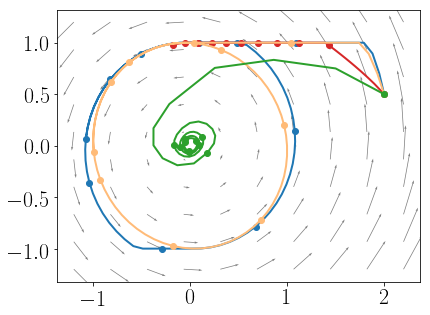

In [130]:
# Gradient Descent with Averaging
x, y = x_0, y_0
LR = 2.
x_hist, y_hist = [x], [y]
x_avg, y_avg = x, y
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    x_ = x + LR/np.sqrt(i+1)*(-y)
    y_ = y + LR/np.sqrt(i+1)*(x)
    
    x, y = x_, np.clip(y_, -1, 1)
    
    x_avg = x_avg*(i+1)/(i+2) + x/(i+2)
    y_avg = y_avg*(i+1)/(i+2) + y/(i+2)
    
    x_hist.append(x_avg)
    y_hist.append(y_avg)
    loss_hist.append(np.sqrt((x_avg-0)**2 + (y_avg-0)**2))
    grad_norm.append(x_avg**2 + y_avg**2)
    
avg_sgd =  ax1.plot(x_hist, y_hist, c=tableau20[4], alpha=1,linewidth=2, label='AvgSGD $\gamma=2.0$',markevery=markevery, marker='o')
ax2.plot(loss_hist, c=tableau20[4], label='AvgSGD $\gamma=2.0$')
ax3.plot(grad_norm, c=tableau20[4], label='AvgSGD $\gamma=2.0$')
fig1

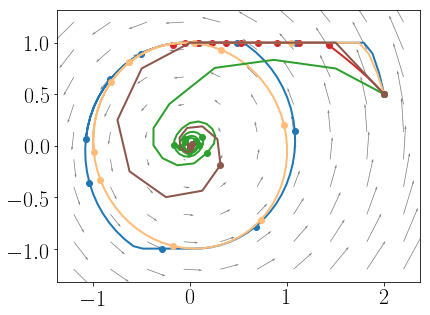

In [131]:
# New Extragradient
x, y = x_0, y_0
x_, y_ = x, y
LR = .5
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    
    x__ = x_
    x_ = x + LR*(-y_)
    y_ = np.clip(y + LR*(x__), -1, 1)
    
    x = x + LR*(-y_)
    y = np.clip(y + LR*(x_), -1, 1)
    
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2 + y**2)

new_extra_sgd = ax1.plot(x_hist, y_hist, c=tableau20[10], alpha=1,linewidth=2, label='OneSEM $\gamma=0.5$',markevery=markevery, marker='o')
ax2.plot(loss_hist, c=tableau20[10], label='OneSEM $\gamma=0.5$')
ax3.plot(grad_norm, c=tableau20[10], label='OneSEM $\gamma=0.5$')
fig1

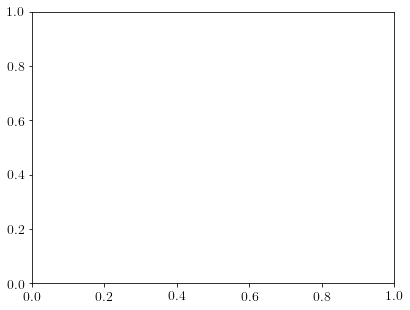

In [132]:
# Extragradient
x, y = x_0, y_0
LR = 0.6
x_hist, y_hist = [x], [y]
loss_hist = [np.sqrt((x-0)**2 + (y-0)**2)]
grad_norm = []
for i in range(N_ITER):
    x_ = x + LR*(-y)
    y_ = y + LR*(x)
    
    x = x + LR*(-y_)
    y = np.clip(y + LR*(x_), -1, 1)
    x_hist.append(x)
    y_hist.append(y)
    loss_hist.append(np.sqrt((x-0)**2 + (y-0)**2))
    grad_norm.append(x**2 + y**2)

extra_sgd = ax1.plot(x_hist, y_hist, c=tableau20[8], alpha=1,linewidth=2, label='SEM $\gamma=0.6$',markevery=markevery, marker='o')
ax2.plot(loss_hist, c=tableau20[8], label='SEM $\gamma=0.6$')
ax3.plot(grad_norm, c=tableau20[8], label='SEM $\gamma=0.6$')

x_init = ax1.scatter(x_0, y_0, marker='s', s=100, c='k',alpha=1,zorder=1000)
ax1.legend([x_init],['Start'], markerscale=0.5, loc=4, fancybox=True, framealpha=1., fontsize=20)
#ax2.legend(loc=2, fancybox=True, framealpha=1., fontsize=14)
ax3.legend(loc=2, fancybox=True, framealpha=1., fontsize=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
ax2.grid(True,which="both",ls="-",alpha=0.4)
ax2.set_xlim(-1,100)
ax2.set_ylim(-0.1,2.1)
ax2.set_yticks([0.,0.5,1.,1.5,2.])
ax3.grid(True,which="both",ls="-",alpha=0.4)
ax1.set_xlabel(r'$\theta$', fontsize = 24)
ax1.set_ylabel(r'$\phi$', fontsize = 24)
ax1.set_title('Gradient Vector Field and Trajectory')
ax2.set_xlabel('Number of Iterations', fontsize = 22)
ax2.set_ylabel('Distance to the optimum', fontsize = 22)
ax2.set_title('Training Curves')
fig1.savefig(os.path.join(OUTPUT_PATH, 'bilinear_toy_vector_field.pdf'), bbox_inches='tight')
fig2.savefig(os.path.join(OUTPUT_PATH, 'bilinear_toy_train_curve.pdf'), bbox_inches='tight')

In [133]:
figLegend = pylab.figure(figsize = (1.5,1.3))
a=pylab.figlegend(*ax1.get_legend_handles_labels(), loc = 'upper left',ncol=2,fontsize=22)
figLegend.savefig(os.path.join(OUTPUT_PATH, 'bilinear_toy_train_curve_lengend.pdf'), bbox_inches='tight')

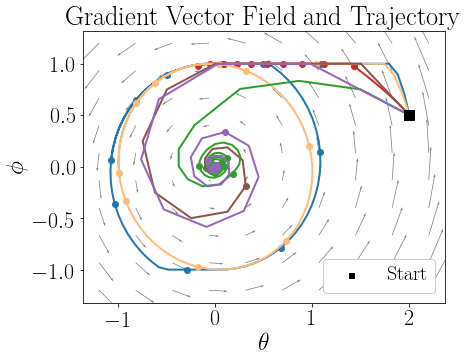

In [134]:
fig1

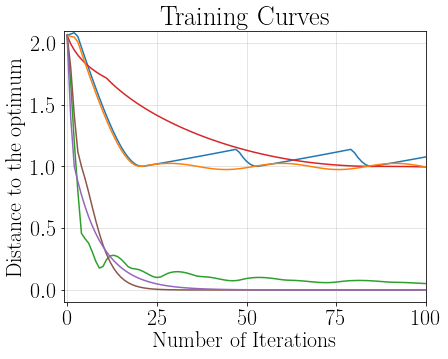

In [135]:
fig2

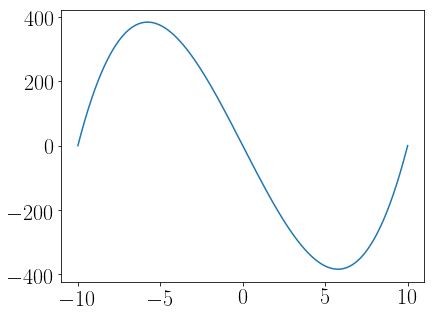

In [120]:
x = np.linspace(-10, 10, 1000)
a = 0
b = -100
c =0
grad_x = 3*x**2 + 2*a*x + b
plt.plot(x, x**3 + a*x**2 + b*x + c)
plt.show()